In [1]:
import numpy as np

from scipy.stats import multivariate_normal
from sklearn.gaussian_process.kernels import RBF, DotProduct

import matplotlib
from matplotlib import rc

rc('text', usetex=True)
rc('text.latex', preamble='\\usepackage{color}')

import matplotlib.pyplot as plt

plt.style.use("bmh")
plt.rcParams["image.cmap"] = "Blues"

# how to plot a function

In [3]:
def f(x):
    return x + 1


def g(x):
    return np.sin(x) * 5 + x ** 2 / 10

In [13]:
num_nodes = 100  # 2, 10, 100

xs = np.linspace(-5, 5, num_nodes)

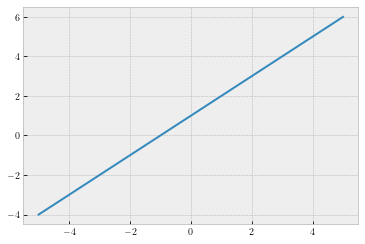

In [11]:
plt.plot(xs, f(xs));

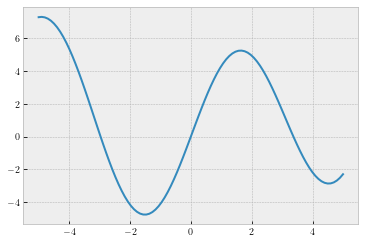

In [14]:
plt.plot(xs, g(xs));

# joint sampling

In [2]:
# kernel = RBF()
kernel = DotProduct()

In [6]:
num_houses = 500
num_samples = 5

xs = np.linspace(-5, 5, num_houses).reshape(-1, 1)

mu = np.zeros_like(xs).flatten()
Sigma = kernel(xs, xs) + np.eye(num_houses) * 1e-4

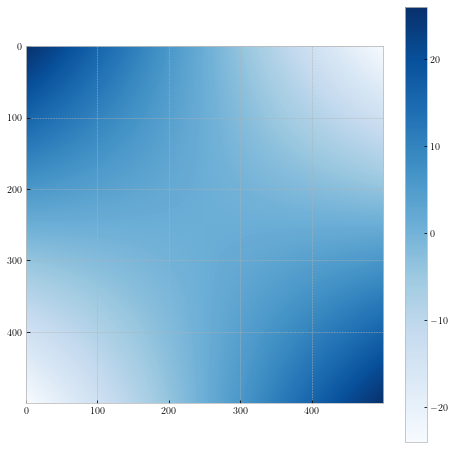

In [4]:
plt.figure(figsize=(8, 8))

plt.imshow(Sigma)
plt.colorbar();

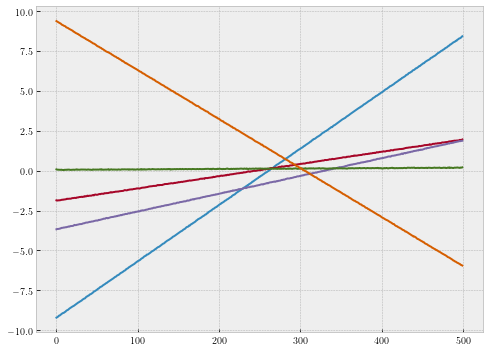

In [7]:
np.random.seed(0)
mvn = multivariate_normal(mu, Sigma)

samples = np.atleast_2d(mvn.rvs(size=num_samples))

plt.figure(figsize=(8, 6))

for i in range(num_samples):
    plt.plot(np.arange(num_houses), samples[i])
    
plt.show()